# Hodgkin-Huxley neuornal model

Im = Cm(dV/dt) + ḡNa × m³ × h × (V - ENa) + ḡK × n⁴ × (V - EK) + gL × (V - EL)

Constant (initialization) parameters (known):
- Cm(dV/dt) - Capacitive current 
- Cm: Membrane capacitance (typically 1 μF/cm²) [For capacitors: I = C × (dV/dt)]
- ḡNa: Maximum sodium conductance (typically 120 mS/cm²)
- ḡK: Maximum potassium conductance (typically 36 mS/cm²)
- gL: Leak conductance (typically 0.3 mS/cm²)
- ENa: Sodium reversal potential (typically +50 mV)
- EK: Potassium reversal potential (typically -77 mV)
- EL: Leak reversal potential (typically -54.4 mV)
- m³ and  n⁴ = probability of ion gate being open
- h voltage gated inactivation gate
- L is the passive leakage ion channel

State Variables (unknown at each step apart from initialization):
- V: Membrane potential (initialize at resting potential, typically -65 mV)
- m: Sodium activation gating variable (initialize at steady-state value)
- h: Sodium inactivation gating variable (initialize at steady-state value)
- n: Potassium activation gating variable (initialize at steady-state value)

Time-related variables (known):
- dt: Time step for numerical integration
- t: Current simulation time
- tmax: Maximum simulation time


Algorithm:
1. Compute voltage dependant params
2. Compute conductance using it 
3. Compute sodium and potasium current usign it
4. Compute total membrane curent using it



# Hodgkin-Huxley Model Calculation Order

0. Initialize parameters and state variables 
   
For each time step:

1. Calculate all the voltage dependant rate constants (α and β) for the current voltage V. They describe the rate for transition from the closed state to the open state and vice versa (prob per unit time):
   - αm(V), βm(V) for sodium activation
     - αm(V) = 0.1 * (V + 40) / (1 - exp(-(V + 40) / 10))
     - βm(V) = 4.0 * exp(-(V + 65) / 18)
   
   - αh(V), βh(V) for sodium inactivation
     - αh(V) = 0.07 * exp(-(V + 65) / 20)
     - βh(V) = 1.0 / (1 + exp(-(V + 35) / 10))
  
   - αn(V), βn(V) for potassium activation
     - αn(V) = 0.01 * (V + 55) / (1 - exp(-(V + 55) / 10))
     - βn(V) = 0.125 * exp(-(V + 65) / 80)
  
2. Calculate the derivatives of gating variables:
   - dm/dt = αm(V)*(1-m) - βm(V)*m
   - dh/dt = αh(V)*(1-h) - βh(V)*h
   - dn/dt = αn(V)*(1-n) - βn(V)*n

3. Calculate all ionic currents using current values of V, m, h, n:
   - INa = ḡNa × m³ × h × (V - ENa)
   - IK = ḡK × n⁴ × (V - EK)
   - IL = gL × (V - EL)

4. Calculate the membrane potential derivative:
   - dV/dt = (I_ext - INa - IK - IL) / Cm

5. Update all state variables using numerical integration:
   - V = V + dV/dt * dt
   - m = m + dm/dt * dt
   - h = h + dh/dt * dt
   - n = n + dn/dt * dt

6. Advance to the next time step and repeat

In [ ]:

# 0. Initialize parameters and state variables 
   
# For each time step:

# 1. Calculate all the voltage dependant rate constants (α and β) for the current voltage V. They describe the rate for transition from the closed state to the open state and vice versa (prob per unit time):
#    - αm(V), βm(V) for sodium activation
#      - αm(V) = 0.1 * (V + 40) / (1 - exp(-(V + 40) / 10))
#      - βm(V) = 4.0 * exp(-(V + 65) / 18)
   
#    - αh(V), βh(V) for sodium inactivation
#      - αh(V) = 0.07 * exp(-(V + 65) / 20)
#      - βh(V) = 1.0 / (1 + exp(-(V + 35) / 10))
  
#    - αn(V), βn(V) for potassium activation
#      - αn(V) = 0.01 * (V + 55) / (1 - exp(-(V + 55) / 10))
#      - βn(V) = 0.125 * exp(-(V + 65) / 80)
  
# 2. Calculate the derivatives of gating variables:
#    - dm/dt = αm(V)*(1-m) - βm(V)*m
#    - dh/dt = αh(V)*(1-h) - βh(V)*h
#    - dn/dt = αn(V)*(1-n) - βn(V)*n

# 3. Calculate all ionic currents using current values of V, m, h, n:
#    - INa = ḡNa × m³ × h × (V - ENa)
#    - IK = ḡK × n⁴ × (V - EK)
#    - IL = gL × (V - EL)

# 4. Calculate the membrane potential derivative:
#    - dV/dt = (I_ext - INa - IK - IL) / Cm

# 5. Update all state variables using numerical integration:
#    - V = V + dV/dt * dt
#    - m = m + dm/dt * dt
#    - h = h + dh/dt * dt
#    - n = n + dn/dt * dt

# 6. Advance to the next time step and repeat

# Cable-HH Model (Spatial Action Potential Propagation Model)

## Initialization Parameters
- **Membrane Properties**: Cm, ḡNa, ḡK, gL, ENa, EK, EL
- **Rate Constants**: All α and β equation parameters
- **Cable Properties**: Ra (axial resistance, Ω·cm), d (diameter, cm)
- **Spatial Parameters**: Δx (compartment length), L (total length)
- **Simulation Parameters**: dt, t_max, stimulus parameters

## State Variables (Updated Each Time Step)
- **V(x,t)**: Membrane potential at position x and time t
- **m(x,t), h(x,t), n(x,t)**: Gating variables at each position

## Algorithm Steps
1. **Discretize the neuron** into N compartments of length Δx
   - Create arrays for V, m, h, n for each compartment

2. **Initialize all compartments** with resting values
   - Set V(x,0) = Vrest for all x
   - Calculate steady-state values for m(x,0), h(x,0), n(x,0)

3. **For each time step**:
   - **For each compartment x**:
     
     a. **Calculate local ionic currents**:
     ```
     Calculate αm(V), βm(V), αh(V), βh(V), αn(V), βn(V) at current V(x,t)
     Calculate dm/dt, dh/dt, dn/dt for position x
     Calculate INa(x) = ḡNa × m³ × h × (V(x) - ENa)
     Calculate IK(x) = ḡK × n⁴ × (V(x) - EK)
     Calculate IL(x) = gL × (V(x) - EL)
     ```
     
     b. **Calculate axial currents between compartments**:
     ```
     Iaxial(x→x+1) = (V(x) - V(x+1)) / (Ra·Δx/A)  [where A = πd²/4]
     Iaxial(x→x-1) = (V(x) - V(x-1)) / (Ra·Δx/A)
     ```
     
     c. **Calculate voltage derivative including spatial components**:
     ```
     dV(x)/dt = (Iext(x) - INa(x) - IK(x) - IL(x) + Iaxial(x→x+1) + Iaxial(x→x-1)) / Cm
     ```
     
     d. **Update all state variables**:
     ```
     V(x,t+dt) = V(x,t) + dV(x)/dt × dt
     m(x,t+dt) = m(x,t) + dm(x)/dt × dt
     h(x,t+dt) = h(x,t) + dh(x)/dt × dt
     n(x,t+dt) = n(x,t) + dn(x)/dt × dt
     ```

4. **Apply stimulus** to specific compartment(s) at designated times

5. **Record and analyze** the spatiotemporal pattern of V(x,t)

This model captures how an action potential initiates at one location (typically the axon hillock) and propagates along the axon. The key addition is the axial current term, which allows adjacent compartments to influence each other through current flow. The action potential propagates because depolarization in one compartment spreads to neighboring compartments, bringing them to threshold and triggering their action potentials in sequence.

The propagation velocity depends on axon diameter, membrane properties, and temperature. Myelination can be modeled by reducing membrane capacitance and conductance in myelinated segments, creating saltatory conduction between nodes of Ranvier.

# NeuroML neuron simulation test

In [1]:
#!/usr/bin/env python3
"""
Simulating a regular spiking Izhikevich neuron with NeuroML.

File: izhikevich-single-neuron.py
"""

from neuroml import NeuroMLDocument
import neuroml.writers as writers
from neuroml.utils import component_factory
from neuroml.utils import validate_neuroml2
from pyneuroml import pynml
from pyneuroml.lems import LEMSSimulation
import numpy as np


# Create a new NeuroML model document
# component_factory: form one: provide name of NeuroML class as string
# advantage of this form: do not need to import all the ComponentType classes
# before using them
nml_doc = component_factory("NeuroMLDocument", id="IzhSingleNeuron")
# component_factory: form two: provide class as argument
# nml_doc = component_factory(NeuroMLDocument, id="IzhSingleNeuron")

# Inspect it:
nml_doc.info()

# Also see contents:
nml_doc.info(show_contents=True)


NeuroMLv2 schema documentation: https://docs.neuroml.org/Userdocs/Schemas/Index.html?highlight=neuroMLDocument#neuromldocument for more information.

Valid members for NeuroMLDocument are:
* ion_channel (class: IonChannel, Optional)
* timed_synaptic_inputs (class: TimedSynapticInput, Optional)
* notes (class: xs:string, Optional)
* ion_channel_hhs (class: IonChannelHH, Optional)
* spike_generators (class: SpikeGenerator, Optional)
* properties (class: Property, Optional)
* ion_channel_v_shifts (class: IonChannelVShift, Optional)
* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)
* annotation (class: Annotation, Optional)
* ion_channel_kses (class: IonChannelKS, Optional)
* spike_generator_poissons (class: SpikeGeneratorPoisson, Optional)
* decaying_pool_concentration_models (class: DecayingPoolConcentrationModel, Optional)
* spike_generator_ref_poissons (class: SpikeGeneratorRefPoisson, Optional)
* fixed_factor_concentration_models (class: FixedFactorConcentrationModel, 

"NeuroMLv2 schema documentation: https://docs.neuroml.org/Userdocs/Schemas/Index.html?highlight=neuroMLDocument#neuromldocument for more information.\n\nValid members for NeuroMLDocument are:\n* ion_channel (class: IonChannel, Optional)\n* timed_synaptic_inputs (class: TimedSynapticInput, Optional)\n* notes (class: xs:string, Optional)\n* ion_channel_hhs (class: IonChannelHH, Optional)\n* spike_generators (class: SpikeGenerator, Optional)\n* properties (class: Property, Optional)\n* ion_channel_v_shifts (class: IonChannelVShift, Optional)\n* spike_generator_randoms (class: SpikeGeneratorRandom, Optional)\n* annotation (class: Annotation, Optional)\n* ion_channel_kses (class: IonChannelKS, Optional)\n* spike_generator_poissons (class: SpikeGeneratorPoisson, Optional)\n* decaying_pool_concentration_models (class: DecayingPoolConcentrationModel, Optional)\n* spike_generator_ref_poissons (class: SpikeGeneratorRefPoisson, Optional)\n* fixed_factor_concentration_models (class: FixedFactorCon

pyNeuroML >>> 18:04:10 - INFO - Loading NeuroML2 file: /Users/gleb/Desktop/CS/Worm_Sim/neuroml/izhikevich2007_single_cell_network.nml
pyNeuroML >>> 18:04:10 - INFO - Writing LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml...
pyNeuroML >>> 18:04:10 - INFO - Written LEMS Simulation example-single-izhikevich2007cell-sim to file: LEMS_example-single-izhikevich2007cell-sim.xml
pyNeuroML >>> 18:04:10 - INFO - Loading LEMS file: LEMS_example-single-izhikevich2007cell-sim.xml and running with jNeuroML
pyNeuroML >>> 18:04:10 - INFO - Executing: (java -Xmx2G  -Djava.awt.headless=true -jar  "/Users/gleb/miniconda3/envs/worm_sim_env/lib/python3.10/site-packages/pyneuroml/utils/./../lib/jNeuroML-0.14.0-jar-with-dependencies.jar"  LEMS_example-single-izhikevich2007cell-sim.xml  -nogui -I '') in directory: .


Izhikevich2007Cell -- Cell based on the modified Izhikevich model in Izhikevich 2007, Dynamical systems in neuroscience, MIT Press

NeuroMLv2 schema documentation: https://docs.neuroml.org/Userdocs/Schemas/Index.html?highlight=izhikevich2007Cell#izhikevich2007cell for more information.

Valid members for Izhikevich2007Cell are:
* id (class: NmlId, Required)
* notes (class: xs:string, Optional)
* properties (class: Property, Optional)
* C (class: Nml2Quantity_capacitance, Required)
* v0 (class: Nml2Quantity_voltage, Required)
* annotation (class: Annotation, Optional)
* k (class: Nml2Quantity_conductancePerVoltage, Required)
* metaid (class: MetaId, Optional)
* vr (class: Nml2Quantity_voltage, Required)
* vt (class: Nml2Quantity_voltage, Required)
* vpeak (class: Nml2Quantity_voltage, Required)
* a (class: Nml2Quantity_pertime, Required)
* b (class: Nml2Quantity_conductance, Required)
* c (class: Nml2Quantity_voltage, Required)
* neuro_lex_id (class: NeuroLexId, Optional)
* d (class: Nm

pyNeuroML >>> 18:04:11 - INFO - Command completed successfully!
pyNeuroML >>> 18:04:11 - INFO - Generating plot: Membrane potential
pyNeuroML >>> 18:04:11 - INFO - Saving image to /Users/gleb/Desktop/CS/Worm_Sim/neuroml/example-single-izhikevich2007cell-sim-v.png of plot: Membrane potential
pyNeuroML >>> 18:04:11 - INFO - Saved image to example-single-izhikevich2007cell-sim-v.png of plot: Membrane potential


<Axes: xlabel='time (s)', ylabel='membrane potential (V)'>

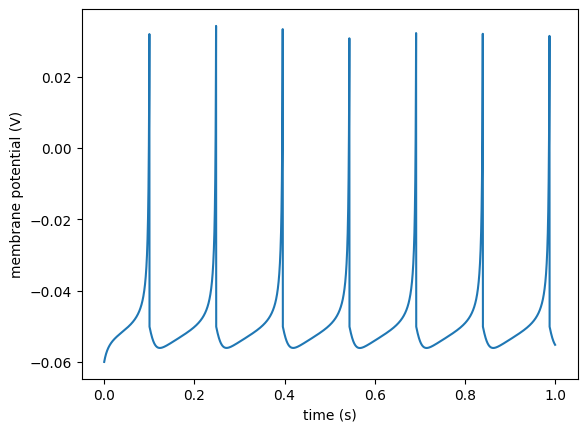

In [2]:
# Define the Izhikevich cell and add it to the model in the document
# the `add` will create and validate the new component, and add it to the
# parent (nml_doc)
izh0 = nml_doc.add(
    "Izhikevich2007Cell",
    id="izh2007RS0", v0="-60mV", C="100pF", k="0.7nS_per_mV", vr="-60mV",
    vt="-40mV", vpeak="35mV", a="0.03per_ms", b="-2nS", c="-50.0mV", d="100pA")

# v0 - Resting potential
# C - Membrane capacitance
# k - voltage sensitivity of ion channels
# vr - resting membrane potential
# vt - threashold potential (for neuron to become likely to fire)
# vpeak - voltage spike
# a - Recovery variable time constan
# b - recovery sensitivity
# c - post spike reset value (the troth of the refractory perio)
# d - controls how long the refactory crator stays down for. ('d' parameter is how tired the neuron gets and how long it needs for recovery)



# Exercise 1: give wrong units of a parameter/parameters
# Exercise 2: skip out a few parameters

# Inspect the component
izh0.info()

# Inspect the component, also show all members:
izh0.info(True)

# inspect the document
nml_doc.info(show_contents=True)

# Create a network and add it to the model
# net = component_factory("Network", id="IzNet")
# Throws an error: why?
# Because a Population is necessary in a Network, but we have not provided one.
# Two workarounds:
# - create population first, and pass that to component_factory here
# - disable validation
net = nml_doc.add("Network", id="IzNet", validate=False)

# Create a population of defined cells and add it to the model
size0 = 1
pop0 = net.add("Population", id="IzhPop0", component=izh0.id, size=size0)

# Define an external stimulus and add it to the model
pg = nml_doc.add(
    "PulseGenerator",
    id="pulseGen_%i" % 0, delay="0ms", duration="1000ms",
    amplitude="0.07 nA"
)
exp_input = net.add("ExplicitInput", target="%s[%i]" % (pop0.id, 0), input=pg.id)

# Write the NeuroML model to a file
nml_file = 'izhikevich2007_single_cell_network.nml'
writers.NeuroMLWriter.write(nml_doc, nml_file)
print("Written network file to: " + nml_file)

# Validate the NeuroML model against the NeuroML schema
validate_neuroml2(nml_file)

################################################################################
# The NeuroML file has now been created and validated. The rest of the code
# involves writing a LEMS simulation file to run an instance of the model

# Create a simulation instance of the model
simulation_id = "example-single-izhikevich2007cell-sim"
simulation = LEMSSimulation(sim_id=simulation_id,
                            duration=1000, dt=0.1, simulation_seed=123)
simulation.assign_simulation_target(net.id)
simulation.include_neuroml2_file(nml_file)

# Define the output file to store simulation outputs
# we record the neuron's membrane potential
simulation.create_output_file(
    "output0", "%s.v.dat" % simulation_id
)
simulation.add_column_to_output_file("output0", 'IzhPop0[0]', 'IzhPop0[0]/v')

# Save the simulation to a file
lems_simulation_file = simulation.save_to_file()

# Run the simulation using the jNeuroML simulator
pynml.run_lems_with_jneuroml(
    lems_simulation_file, max_memory="2G", nogui=True, plot=False
)

# Load the data from the file and plot the graph for the membrane potential
# using the pynml generate_plot utility function.
data_array = np.loadtxt("%s.v.dat" % simulation_id)
pynml.generate_plot(
    [data_array[:, 0]], [data_array[:, 1]],
    "Membrane potential", show_plot_already=False,
    save_figure_to="%s-v.png" % simulation_id,
    xaxis="time (s)", yaxis="membrane potential (V)"
)